In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print(tf.__version__)
%matplotlib inline

2.4.1


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
image_gen=ImageDataGenerator(rotation_range=30,#rotate the image 30 degrees
                             width_shift_range=0.1,#shift the pic width by amax of 10%
                             height_shift_range=0.1,#shift the pic height by amax of 10%
                             rescale=1/255,#rescale tghe image by normalizing it
                             shear_range=0.2,#shear means cutting away part of the image(max 20%)
                             zoom_range=0.2,# Zoom in by 20% max
                             horizontal_flip=True,#allow horizontal flipping
                             fill_mode='nearest'#fill in  missing pixel with the nearest filled value
                            )

In [14]:
# width,height,channel
image_shape=(150,150,3)


Creating the Model

In [15]:
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D


In [16]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))


#DropOuts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of the Neurons

model.add(Dropout(0.5))
# Last layer for 0=beer and 1=pepsi
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',#Computes the cross-entropy loss between true labels and predicted labels.
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [18]:
batch_size=16

train_image_gen=image_gen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/Scripts_Old/CNN CD Classification/Beer_Cherry/Train',target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')



Found 1386 images belonging to 2 classes.


In [19]:
test_image_gen=image_gen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/Scripts_Old/CNN CD Classification/Beer_Cherry/Test',target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 200 images belonging to 2 classes.


In [20]:
train_image_gen.class_indices

{'M.Beer': 0, 'P.Cherry': 1}

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
results=model.fit_generator(train_image_gen,epochs=10,
                           steps_per_epoch=25,
                           validation_data=test_image_gen,
                            validation_steps=12,
                            verbose=2)

Epoch 1/10
25/25 - 142s - loss: 0.7037 - accuracy: 0.5482 - val_loss: 0.7446 - val_accuracy: 0.4948
Epoch 2/10
25/25 - 71s - loss: 0.6943 - accuracy: 0.5200 - val_loss: 0.6605 - val_accuracy: 0.5052
Epoch 3/10
25/25 - 51s - loss: 0.4302 - accuracy: 0.8125 - val_loss: 0.3894 - val_accuracy: 0.8854
Epoch 4/10
25/25 - 31s - loss: 0.1426 - accuracy: 0.9518 - val_loss: 0.1021 - val_accuracy: 0.9531
Epoch 5/10
25/25 - 29s - loss: 0.0651 - accuracy: 0.9825 - val_loss: 0.1634 - val_accuracy: 0.9427
Epoch 6/10
25/25 - 19s - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0640 - val_accuracy: 0.9792
Epoch 7/10
25/25 - 16s - loss: 0.0646 - accuracy: 0.9898 - val_loss: 0.1288 - val_accuracy: 0.9740
Epoch 8/10
25/25 - 13s - loss: 0.0451 - accuracy: 0.9925 - val_loss: 0.0464 - val_accuracy: 0.9844
Epoch 9/10
25/25 - 11s - loss: 0.0161 - accuracy: 0.9975 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 10/10
25/25 - 10s - loss: 0.0325 - accuracy: 0.9950 - val_loss: 0.0132 - val_accuracy: 0.9948


In [24]:
model.save(r'/content/drive/MyDrive/Colab Notebooks/Scripts_Old/CNN CD Classification/Beer_Cherry.h5')

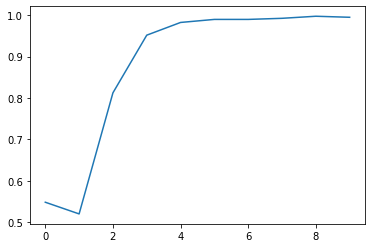

In [27]:
plt.plot(results.history['accuracy'])